In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
data = pd.read_csv("linear-regression-dataset.csv")

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   deneyim  14 non-null     float64
 1   maas     14 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 352.0 bytes
None


In [5]:
print(data.head())

   deneyim  maas
0      0.5  2500
1      0.0  2250
2      1.0  2750
3      5.0  8000
4      8.0  9000


In [6]:
print(data.describe())

         deneyim          maas
count  14.000000     14.000000
mean    6.250000   8778.571429
std     4.979767   5733.495185
min     0.000000   2250.000000
25%     2.250000   4125.000000
50%     5.500000   7750.000000
75%     9.500000  12000.000000
max    15.000000  20000.000000


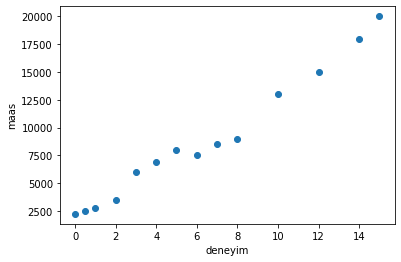

In [7]:
plt.scatter(data.deneyim,data.maas)
plt.xlabel("deneyim")
plt.ylabel("maas")
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

In [13]:
# linear regression model
linear_reg = LinearRegression()

In [14]:
x = data.deneyim.values.reshape(-1,1)
y = data.maas.values.reshape(-1,1)
linear_reg.fit(x,y)

LinearRegression()

In [15]:
print('R sq: ', linear_reg.score(x, y))
print('Correlation: ', math.sqrt(linear_reg.score(x, y)))

R sq:  0.9775283164949902
Correlation:  0.9887003168275967


In [18]:
#prediction
print("Coefficient for X: ", linear_reg.coef_)
print("Intercept for X: ", linear_reg.intercept_)
print("Regression line is: y = " + str(linear_reg.intercept_[0]) + " + (x * " + str(linear_reg.coef_[0][0]) + ")")

Coefficient for X:  [[1138.34819698]]
Intercept for X:  [1663.89519747]
Regression line is: y = 1663.895197474103 + (x * 1138.3481969755721)


In [19]:
# maas = 1663 + 1138*deneyim 
maas_yeni = 1663 + 1138*11
print(maas_yeni)

array = np.array([11]).reshape(-1,1)
print(linear_reg.predict(array))

14181
[[14185.72536421]]


array([[115498.71489503]])

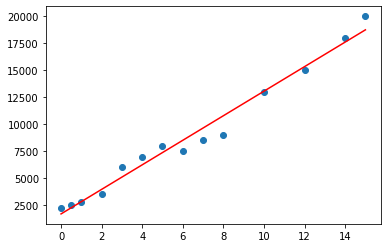

In [20]:
# visualize line
array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)  # deneyim

plt.scatter(x,y)
#plt.show()
y_head = linear_reg.predict(array)  # maas
plt.plot(array, y_head,color = "red")
array = np.array([100]).reshape(-1,1)
linear_reg.predict(array)

In [21]:
y_head = linear_reg.predict(x)  # maas
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y,y_head))

r_square score:  0.9775283164949902


In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data=sns.load_dataset("tips")
df=pd.DataFrame(data)

#EKSİK VERİ DOLDURMA
from sklearn.impute import SimpleImputer
import numpy as np

imputer=SimpleImputer(missing_values=np.nan, strategy="mean") #eksik verileri boş sütünlarına ortalamasını verdik
imputer=imputer.fit(df[["total_bill"]])
df[["total_bill"]]=imputer.transform(df[["total_bill"]])

#KATEGORİK OLMAYAN DEĞİŞKENLER
total_bill=df[["total_bill"]]
tip=df[["tip"]]
size=df[["size"]]

#KATEGORİK DEĞİŞKENLER

import pandas as pd
smoker=pd.get_dummies(df[["smoker"]])
time=pd.get_dummies(df[["day"]])

result=df["day"].value_counts()

#KUKLA (DUMMIES) DEĞİŞKENİNİ KALDIRMA
smoker=smoker.drop("smoker_Yes",axis=1)

#VERİLERİ BİRLEŞTİRME
new_data=pd.concat([total_bill,size,smoker,time,tip],axis=1) # tahmin etmek istedğiniz değeri sona koyun train test split için kolaylık sağlar

#TRAİN VE TEST BELİRLEME
training=new_data.iloc[:,0:1].values # 7 ye kadarkı stunlar train için
testing=new_data.iloc[:,7:8].values

#TRAİN VE TEST AYIRMA
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(training,testing,test_size=0.30,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred=linear_reg.predict(x_test)

In [25]:
from sklearn.metrics import r2_score, mean_squared_error

print("Train R2 Score:",r2_score(y_train,linear_reg.predict(x_train)))
print("Test R2 Score:",r2_score(y_test,linear_reg.predict(x_test)))

print("Ortalama Test Hatası:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Ortalama Train Hatası:",np.sqrt(mean_squared_error(y_train,linear_reg.predict(x_train))))

print("Sabit Katsayı:",linear_reg.intercept_)
print("Ağırlıklar:",linear_reg.coef_)

Train R2 Score: 0.45555590764504406
Test R2 Score: 0.4291782688312412
Ortalama Test Hatası: 0.86743935521794
Ortalama Train Hatası: 1.0783029500384542
Sabit Katsayı: [0.87695764]
Ağırlıklar: [[0.10889371]]


In [26]:
size_deger=int(input("Toplam Ücreti Giriniz:"))
print("Tahmin:",linear_reg.intercept_[0]+linear_reg.coef_[:,0]*size_deger)

Toplam Ücreti Giriniz: 2


Tahmin: [1.09474506]


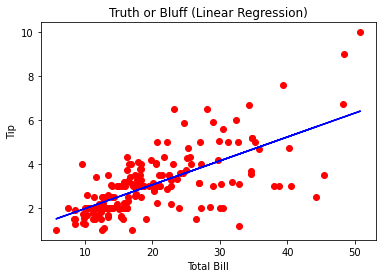

In [27]:
plt.scatter(x_train,y_train,color="red")
plt.plot(x_train,linear_reg.predict(x_train),color="blue")

plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()